In [16]:
library(DESeq2)
library(enrichplot)
library(clusterProfiler)
library(ggplot2)
library(org.Hs.eg.db)

In [17]:
deseq_gdiff = readRDS('../../rds/deseq2_gut_diff_mockvirus.rds')

In [18]:
# Load your DESeq2 results data
#deseq_gdiff <- readRDS('../../rds/deseq2_gut_diff_mockvirus.rds')

# Define significance criteria (modify if needed)
lfc_threshold <- 1
padj_threshold <- 0.05

# Extract significantly differentially expressed genes for each virus set
sig_MLB2 <- rownames(deseq_gdiff$MLB2)[
  which(abs(deseq_gdiff$MLB2$log2FoldChange) > lfc_threshold &
        deseq_gdiff$MLB2$padj < padj_threshold)
]

sig_VA1 <- rownames(deseq_gdiff$VA1)[
  which(abs(deseq_gdiff$VA1$log2FoldChange) > lfc_threshold &
        deseq_gdiff$VA1$padj < padj_threshold)
]

sig_HAstV4 <- rownames(deseq_gdiff$HAstV4)[
  which(abs(deseq_gdiff$HAstV4$log2FoldChange) > lfc_threshold &
        deseq_gdiff$HAstV4$padj < padj_threshold)
]


In [19]:
# Find the common genes across all three virus conditions
#Reduce(intersect, list(...)) takes the intersection across all lists, resulting in the genes that are significantly differentially expressed in all three virus conditions.
common_genes <- Reduce(intersect, list(sig_MLB2, sig_VA1, sig_HAstV4))

# Display the common genes
print(common_genes)


[1] "ENSG00000120937" "ENSG00000137965" "ENSG00000163121" "ENSG00000232810"
[5] "ENSG00000125148"


In [20]:
# Create a summary table for the common genes showing log2FoldChange in each condition
common_summary <- data.frame(
  gene_id = common_genes,
  MLB2_log2FC = deseq_gdiff$MLB2[common_genes, "log2FoldChange"],
  VA1_log2FC = deseq_gdiff$VA1[common_genes, "log2FoldChange"],
  HAstV4_log2FC = deseq_gdiff$HAstV4[common_genes, "log2FoldChange"]
)

print(common_summary)


          gene_id MLB2_log2FC VA1_log2FC HAstV4_log2FC
1 ENSG00000120937    2.469179   2.125118      2.441276
2 ENSG00000137965    3.058457   8.239691      8.732591
3 ENSG00000163121   -2.305878   2.484736      3.167156
4 ENSG00000232810   -4.957630   3.106031      4.651187
5 ENSG00000125148   -1.102850   1.220562      1.143456


In [21]:
genes = read.csv('../../output/gut/gut_genes.csv',row.names = 1)

In [22]:
# Check the first few common gene IDs
head(common_genes)

# Check the row names of genes
head(rownames(genes))


[1] "ENSG00000120937" "ENSG00000137965" "ENSG00000163121" "ENSG00000232810"
[5] "ENSG00000125148"

[1] "ENSG00000279928" "ENSG00000228037" "ENSG00000142611" "ENSG00000284616"
[5] "ENSG00000157911" "ENSG00000269896"

In [23]:
# Create a summary data frame for the common genes
common_summary <- data.frame(
  gene_id = common_genes,
  MLB2_log2FC = deseq_gdiff$MLB2[common_genes, "log2FoldChange"],
  VA1_log2FC = deseq_gdiff$VA1[common_genes, "log2FoldChange"],
  HAstV4_log2FC = deseq_gdiff$HAstV4[common_genes, "log2FoldChange"]
)

# Add the gene names from the 'genes' data frame.
# We assume the row names of 'genes' match the gene IDs.
common_summary$gene_name <- genes[common_summary$gene_id, "gene_name"]

# Display the summary
print(common_summary)


          gene_id MLB2_log2FC VA1_log2FC HAstV4_log2FC gene_name
1 ENSG00000120937    2.469179   2.125118      2.441276      NPPB
2 ENSG00000137965    3.058457   8.239691      8.732591     IFI44
3 ENSG00000163121   -2.305878   2.484736      3.167156    NEURL3
4 ENSG00000232810   -4.957630   3.106031      4.651187       TNF
5 ENSG00000125148   -1.102850   1.220562      1.143456      MT2A


In [12]:
#write.csv(common_summary, file = "gdiff_common_genes_summary.csv", row.names = FALSE)

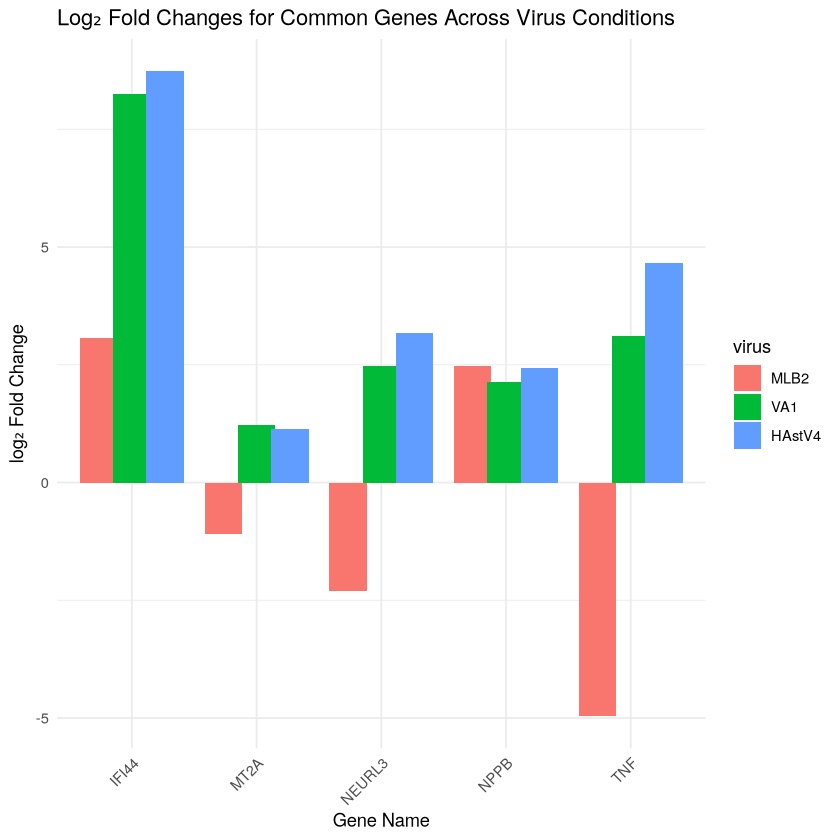

In [24]:
# Load required libraries
library(ggplot2)
library(tidyr)
library(dplyr)

# Assuming 'common_summary' already has columns:
# gene_id, gene_name, MLB2_log2FC, VA1_log2FC, HAstV4_log2FC

# Convert the wide-format data into a long format
common_summary_long <- common_summary %>%
  pivot_longer(
    cols = c("MLB2_log2FC", "VA1_log2FC", "HAstV4_log2FC"),
    names_to = "virus",
    values_to = "log2FC"
  )

# Optionally, you can clean up the virus names if needed:
common_summary_long$virus <- factor(common_summary_long$virus,
                                    levels = c("MLB2_log2FC", "VA1_log2FC", "HAstV4_log2FC"),
                                    labels = c("MLB2", "VA1", "HAstV4"))

# Create a grouped bar plot
ggplot(common_summary_long, aes(x = gene_name, y = log2FC, fill = virus)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  theme_minimal() +
  labs(
    title = "Log₂ Fold Changes for Common Genes Across Virus Conditions",
    x = "Gene Name",
    y = "log₂ Fold Change"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


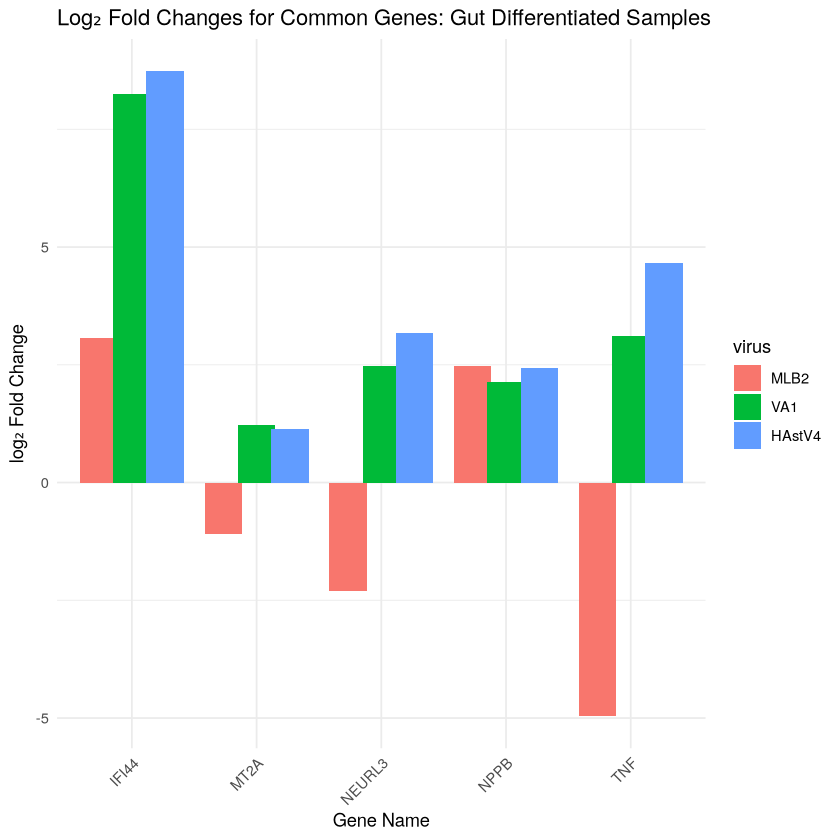

In [27]:
# Create a grouped bar plot
plot_common <- ggplot(common_summary_long, aes(x = gene_name, y = log2FC, fill = virus)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  theme_minimal() +
  labs(
    title = "Log₂ Fold Changes for Common Genes: Gut Differentiated Samples",
    x = "Gene Name",
    y = "log₂ Fold Change"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Display the plot
print(plot_common)

# Save the plot as a PNG file
#ggsave("common_genes_plot.png", plot = plot_common, width = 8, height = 6, dpi = 300)

In [28]:
ggsave("gdiff_common_genes_plot1.png", plot = plot_common, width = 8, height = 6, dpi = 300)

In [29]:
print (common_genes)

[1] "ENSG00000120937" "ENSG00000137965" "ENSG00000163121" "ENSG00000232810"
[5] "ENSG00000125148"


In [30]:
deseq_brain = readRDS('../../rds/deseq2_brain_mockvirus.rds')
deseq_gundiff = readRDS('../../rds/deseq2_gut_undiff_mockvirus.rds')

In [31]:
# Create summary for gut undifferentiated
gundiff_summary <- data.frame(
  gene_id = common_genes,
  MLB2_log2FC = deseq_gundiff$MLB2[common_genes, "log2FoldChange"],
  VA1_log2FC  = deseq_gundiff$VA1[common_genes, "log2FoldChange"],
  HAstV4_log2FC = deseq_gundiff$HAstV4[common_genes, "log2FoldChange"]
)

# Create summary for brain
brain_summary <- data.frame(
  gene_id = common_genes,
  MLB2_log2FC = deseq_brain$MLB2[common_genes, "log2FoldChange"],
  VA1_log2FC  = deseq_brain$VA1[common_genes, "log2FoldChange"],
  HAstV4_log2FC = deseq_brain$HAstV4[common_genes, "log2FoldChange"]
)

# Add gene names using your existing 'genes' data frame
gundiff_summary$gene_name <- genes[gundiff_summary$gene_id, "gene_name"]
brain_summary$gene_name   <- genes[brain_summary$gene_id, "gene_name"]

# View the results
print(gundiff_summary)
print(brain_summary)

          gene_id MLB2_log2FC VA1_log2FC HAstV4_log2FC gene_name
1 ENSG00000120937   0.4328894 -0.7128880     0.8564433      NPPB
2 ENSG00000137965  -3.7479889  6.3915380     7.8775599     IFI44
3 ENSG00000163121   4.0676034  5.3641277     6.9232096    NEURL3
4 ENSG00000232810   0.0000000  6.2378640     6.4779760       TNF
5 ENSG00000125148   0.7384703  0.9147621     1.5245626      MT2A
          gene_id MLB2_log2FC  VA1_log2FC HAstV4_log2FC gene_name
1 ENSG00000120937          NA          NA            NA      NPPB
2 ENSG00000137965   0.2172075 -0.67742376    -0.7318159     IFI44
3 ENSG00000163121          NA          NA            NA    NEURL3
4 ENSG00000232810          NA          NA            NA       TNF
5 ENSG00000125148  -0.5481698 -0.09110927    -0.7947539      MT2A


Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_bar()`).”


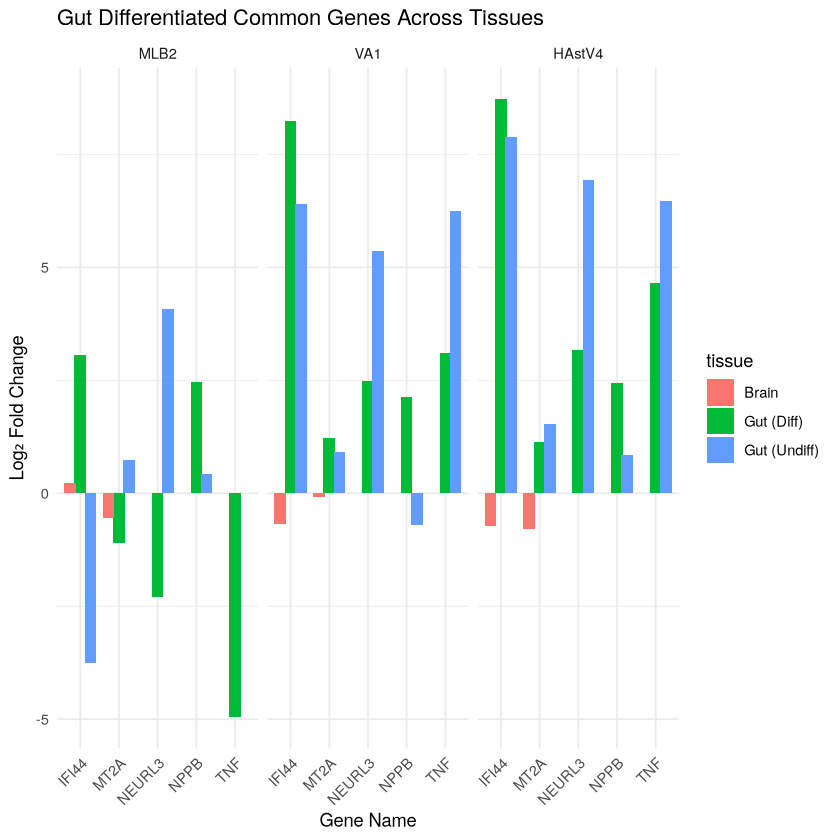

In [32]:
# Add tissue labels
common_summary$tissue <- "Gut (Diff)"
gundiff_summary$tissue <- "Gut (Undiff)"
brain_summary$tissue <- "Brain"

# Combine all summaries
combined_summary <- bind_rows(common_summary, gundiff_summary, brain_summary)

# Reshape to long format
combined_long <- pivot_longer(combined_summary,
  cols = c("MLB2_log2FC", "VA1_log2FC", "HAstV4_log2FC"),
  names_to = "virus",
  values_to = "log2FC"
)

# Clean up virus names
combined_long$virus <- factor(combined_long$virus,
  levels = c("MLB2_log2FC", "VA1_log2FC", "HAstV4_log2FC"),
  labels = c("MLB2", "VA1", "HAstV4")
)

# Create the plot
p <- ggplot(combined_long, aes(x = gene_name, y = log2FC, fill = tissue)) +
  geom_bar(stat = "identity", position = position_dodge(0.8)) +
  facet_wrap(~virus) +
  theme_minimal() +
  labs(title = "Gut Differentiated Common Genes Across Tissues",
       x = "Gene Name", y = "Log₂ Fold Change") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Show plot
print(p)


In [33]:
ggsave("Gdiff_common_genes_in_all_tissues.png", p, width = 10, height = 6, dpi = 300)

Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_bar()`).”



	Pearson's product-moment correlation

data:  x and y
t = 4.4077, df = 11003, p-value = 1.054e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02331794 0.06061940
sample estimates:
      cor 
0.0419833 


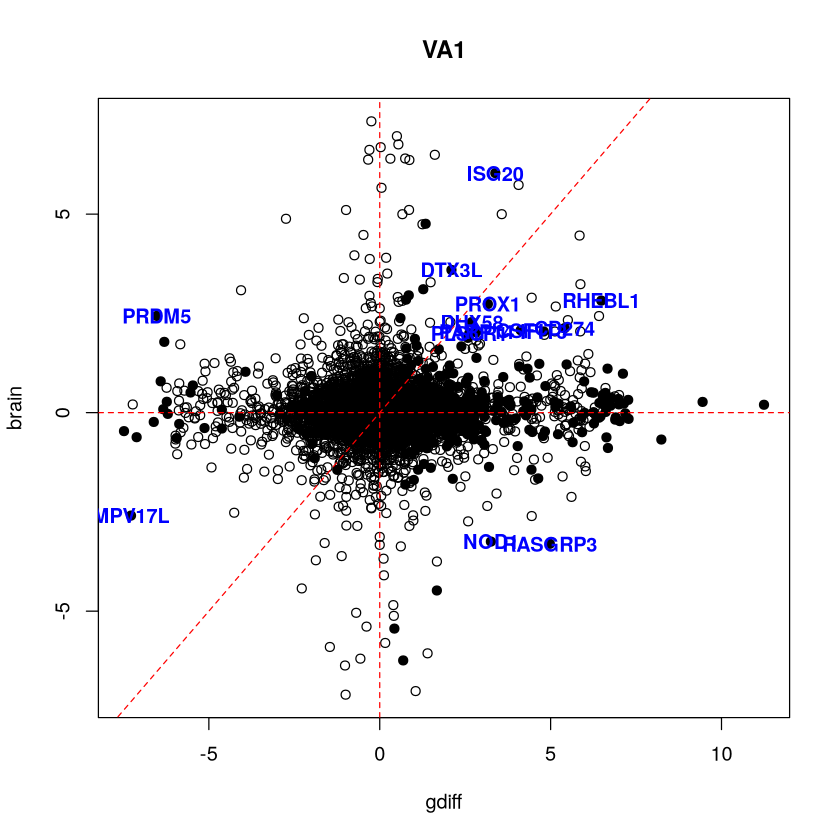

In [83]:
#v = 'HAstV4'
v = 'VA1'
xcnd = deseq_gdiff
ycnd = deseq_brain #deseq_gundiff

cmn = intersect(rownames(xcnd[[v]]),rownames(ycnd[[v]]))
sgn = xcnd[[v]][cmn,'padj'] < 0.05
x = xcnd[[v]][cmn,'log2FoldChange']
y = ycnd[[v]][cmn,'log2FoldChange']

plot(x,y,pch=ifelse(sgn,19,1),xlab='gdiff',ylab='brain',main=v)
abline(h=0,col='red',lty=2)
abline(v=0,col='red',lty=2)
abline(a=0,b=1,col='red',lty=2)

selgenes = sgn & abs(xcnd[[v]][cmn,'log2FoldChange']) > 2 &  abs(ycnd[[v]][cmn,'log2FoldChange']) > 2 
text(x[selgenes],y[selgenes],genes[cmn[selgenes],'gene_name'],col='blue',font=2)
cor.test(x,y,m='p')

In [81]:
#v = 'HAstV4'
v = 'VA1'
xcnd = deseq_gdiff
ycnd = deseq_brain #deseq_gundiff

cmn = intersect(rownames(xcnd[[v]]),rownames(ycnd[[v]]))
sgn = cmn[xcnd[[v]][cmn,'padj'] < 0.05 & abs(xcnd[[v]][cmn,'log2FoldChange']) > 2]
#hist(ycnd[[v]][sgn,'pvalue'],100)
#hist(ycnd[[v]][sgn,'log2FoldChange'])
padj = p.adjust(ycnd[[v]][sgn,'pvalue'],m='BH')
padj[is.na(padj)] = 1
ycnd[[v]][sgn[padj<0.1],]
genes[sgn[padj<0.1],]

log2 fold change (MLE): condition VA1 vs Mock 
Wald test p-value: condition VA1 vs Mock 
DataFrame with 1 row and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000117707   71.7438        2.73574  0.612403   4.46723 7.92408e-06
                     padj
                <numeric>
ENSG00000117707   0.10566

,chr,start,end,strand,gene_id,gene_name,gene_biotype
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000117707,1,213983181,214041510,+,ENSG00000117707,PROX1,protein_coding
